# Google colab initialization

For Google colab uncomment these lines and run them to access your drive or try the second way (not tested)

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
# import sys
#
# sys.path.insert(1, r'/content/drive/My Drive/')

In [2]:
# Other try
# !git clone https://github.com/Alexanderstaehle/OM_project

In [3]:
# import sys
# sys.path.append("OM_project")

In [4]:
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

from utils import ml_utils, visualization, data_loading, tf_models

In [5]:
data_loading.initialize_env()
sns.set_theme()
color_map = sns.color_palette(as_cmap=True)
ml_utils.check_tpu_gpu()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Number of accelerators:  1


# Different batch sizes with fixed learning rate

In [6]:
models_dict_fixed = {}
batch_sizes = [32, 64, 128, 256, 512, 1024]
# batch_sizes = [32, 64, 128]
lr = 0.001
training_epochs = 10

In [7]:
for batch_size in batch_sizes:
    # Read training data
    train, validation = data_loading.load_batched_and_resized_dataset(dataset_name='MNIST', batch_size=batch_size,
                                                                      img_size=32)
    model = tf_models.build_simple_dense_model(train)
    train_callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor="val_loss", patience=10,
            restore_best_weights=True
        ),
        # tf.keras.callbacks.ReduceLROnPlateau(
        #     monitor="val_loss", factor=0.5,
        #     patience=3, verbose=1
        # )
    ]
    optimizer = keras.optimizers.Adam(learning_rate=lr)
    # Need sparse categorical crossentropy since our labels are in form of integers not vectors
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    models_dict_fixed[batch_size] = ml_utils.train_model(model, train, validation, epochs=10,
                                                         extra_callbacks=train_callbacks, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 2.3195 - accuracy: 0.5528 - val_loss: 2.2928 - val_accuracy: 0.5330

In [8]:
ml_utils.save_model_state(models_dict_fixed, 'model_fixed_lr_diff_bs')

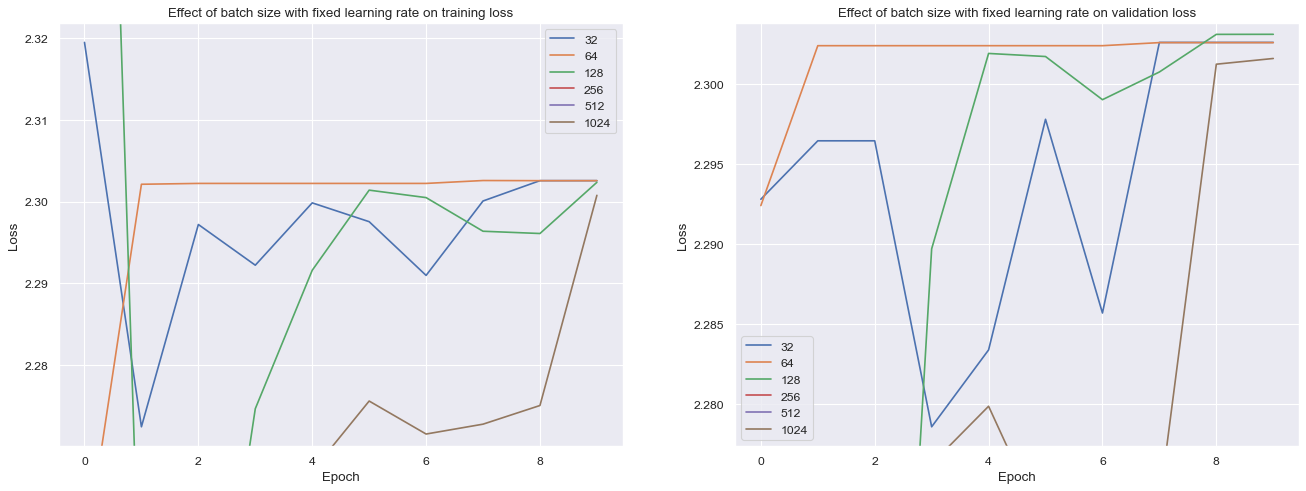

<Figure size 432x288 with 0 Axes>

In [9]:
visualization.plot_loss_by_param(models_dict_fixed, 'batch size with fixed learning rate', 'fixed_lr_diff_bs')


# Different batch sizes with linear increasing learning rate

In [10]:
learning_rates = [0.001, 0.002, 0.004, 0.008, 0.016, 0.032]